In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/spam.csv", encoding="latin-1")
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/spam.csv", encoding="latin-1")

# Keep only relevant columns
df = df[['label', 'text']]
df.columns = ['label', 'message']

# Convert labels to binary (spam = 1, ham = 0)
df['label'] = df['label'].map({'spam': 1, 'ham': 0})

# Display first few rows
print(df.head())

   label                                            message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


In [6]:
# Convert text messages into binary word occurrence features
vectorizer = CountVectorizer(binary=True, stop_words='english')

# Transform text into feature matrix
X = vectorizer.fit_transform(df['message'])
y = df['label']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Initialize Bernoulli Naïve Bayes classifier
bnb = BernoulliNB()

# Train the model
bnb.fit(X_train, y_train)

BernoulliNB()

In [8]:
# Predict on test data
y_pred = bnb.predict(X_test)

# Print some predictions
print("Predicted Labels:", y_pred[:10])

Predicted Labels: [0 0 0 0 1 0 0 0 0 0]


Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.98      0.83      0.90       150

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115



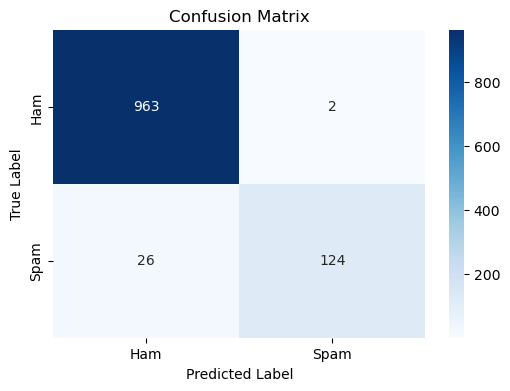

In [9]:
# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()